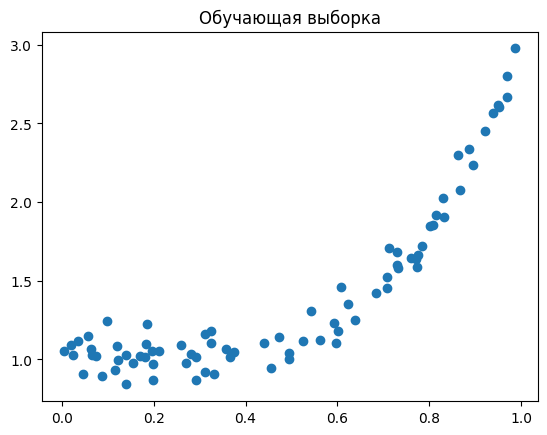

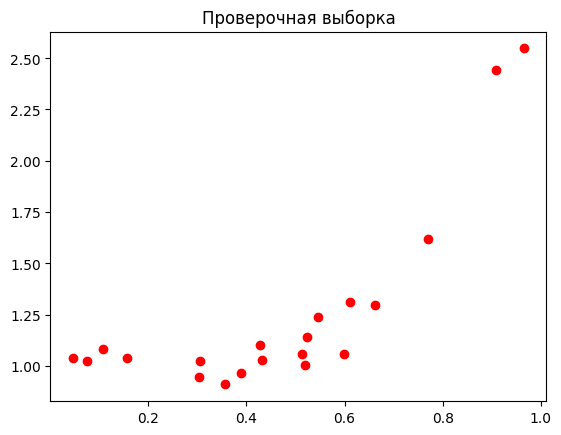

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# инициализация повторяемой последовательности случайных чисел
np.random.seed(42)

# создаём np-массив из 100 случайных чисел в диапазоне 0..1
sz = 100
x = np.random.rand(sz, 1)

# строим функцию y = f(x) и добавляем немного гауссова шума
y = 1 + 2 * x * x * x * x + 0.1 * np.random.randn(sz, 1)

# формируем индексы от 0 до 99
idx = np.arange(sz)
# случайно их тасуем
np.random.shuffle(idx)


# первые 80 случайных индексов (значений x) используем для обучения
sz80 = (int)(sz*0.8)
train_idx = idx[: sz80]

# оставшиеся 20 -- для валидации
val_idx = idx[sz80:]

# формируем наборы обучающих данных
x_train, y_train = x[train_idx], y[train_idx]
# и наборы для валидации
x_val, y_val = x[val_idx], y[val_idx]

# выводим на экран
plt.scatter(x_train, y_train)
plt.title('Обучающая выборка')
plt.show()
plt.scatter(x_val, y_val, color= "red")
plt.title('Проверочная выборка')
plt.show()


In [42]:
np.random.seed(42)

# задаём начальные случайные значения коэффициентам линейной регрессии
a = np.random.randn(1)
b = np.random.randn(1)
print(a,b)

# скорость обучения
lr = 0.1
# количество эпох
n_epochs = 1000

# основной цикл
for epoch in range(n_epochs):

    # рассчитываем результирующий массив с текущими коэффициентами a и b
    # на основе обучающей выборки
    yhat = a + b * x_train

    # 1. определяем лосс
    # сперва считаем отклонение нового результата от обучающего:
    error = (y_train - yhat)
    # и затем считаем среднеквадратическую ошибку:
    loss = (error ** 2).mean()

    # 2. считаем градиенты (вспоминая формулу производной)
    # для коэффициента a
    a_grad = -2 * error.mean()
    # для коэффициента b
    b_grad = -2 * (x_train * error).mean()

    # 3. обновляем параметры, используя коэффициент скорости обучения,
    # градиенты берём с обратным знаком
    a = a - lr * a_grad
    b = b - lr * b_grad
print(a,b)

[0.49671415] [-0.1382643]
[1.97813094] [0.95220197]


In [47]:
import torch # подключаем основной пакет PyTorch

# стандартная команда настройки девайса на GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# Наши исходные данные хранятся в формате массивов NumPy,
# требуется преобразовать их в формат тензоров PyTorch,
# привести к типу float и выгрузить на девайс
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)
print(x_train_tensor.type())

cpu
torch.FloatTensor


In [4]:
# инициализация повторяемой посл-ти случайных чисел
torch.manual_seed(42)

# задаём начальные случайные значения коэффициентам линейной регрессии
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [5]:
# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

for epoch in range(n_epochs):

    # как и в примере с numpy, записываем нашу линейную зависимость,
    # только теперь в качестве обучающей выборки -- тензор
    yhat = a + b * x_train_tensor

    # 1. считаем лосс как и раньше
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # 2. вычисляем градиенты автоматически!
    loss.backward()


    # ПЕРВАЯ ПОПЫТКА (неверно)
    # TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'
    # a = a - lr * a.grad
    # b = b - lr * b.grad

    # ВТОРАЯ ПОПЫТКА (неверно)
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad

    # ТРЕТЬЯ ПОПЫТКА (верно)
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad

    # Обнуляем градиенты вручную
    a.grad.zero_()
    b.grad.zero_()

print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


In [6]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=3b36f7c8b38e56badb18962dc0e9700dd76159778f180fd2aa33614338477850
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


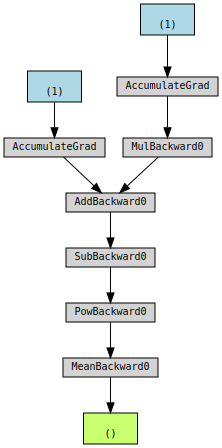

In [10]:
import torchviz

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

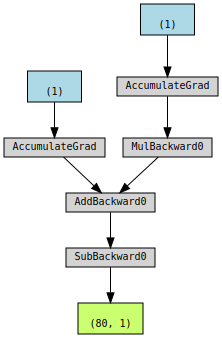

In [14]:

torchviz.make_dot(error) # визуализируем граф вычислений

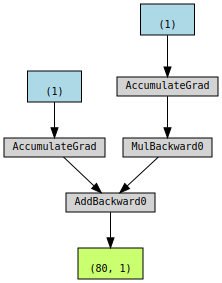

In [13]:


torchviz.make_dot(yhat) # визуализируем граф вычислений

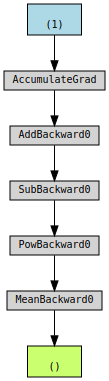

In [16]:
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

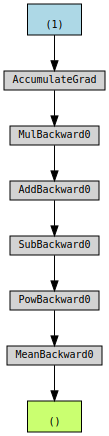

In [17]:
a = torch.randn(1, requires_grad=False, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

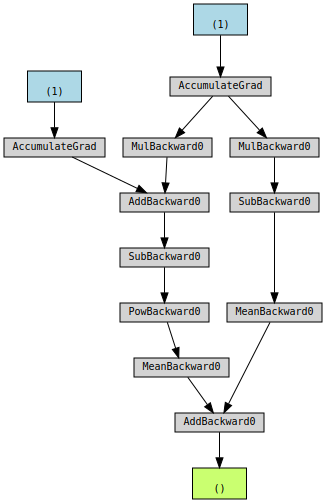

In [18]:
import torchviz

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

# это полная чушь! этот код только для демонстрации разветвления в графе!
if loss > 0:
  yhat2 = b * x_train_tensor
  error2 = y_train_tensor - yhat2

loss += error2.mean()

torchviz.make_dot(loss) # визуализируем граф вычислений

In [48]:
from torch import optim, nn

torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

# скорость обучения
lr = 0.1

# количество эпох
n_epochs = 1000

# функция расчёта лосса
loss_fn = nn.MSELoss(reduction='mean')

# создаём SGD оптимизатор для автоматического обновления параметров
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b  * x_train_tensor * x_train_tensor
    # error = y_train_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([0.8810], requires_grad=True) tensor([1.6318], requires_grad=True)
